# Set up

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data set and explore a bit

In [2]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

# Linear SVM Classification

In [6]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

In [7]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [8]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

SVC(C=1e+100, kernel='linear')

In [9]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [10]:
def plot_svc_decision_boundary(svm_clf: SVC, xmin, xmax):
    bias = svm_clf.intercept_[0]
    weight = svm_clf.coef_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -weight[0] / weight[1] * x0 - bias / weight[1]

    margin = 1 / weight[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors="#AAA", zorder=-1)

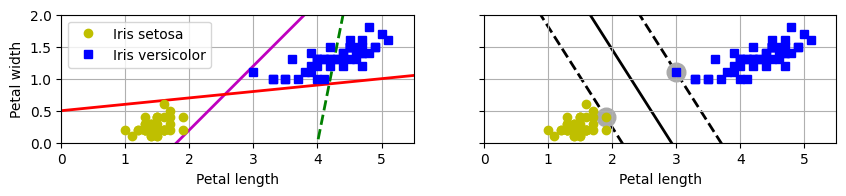

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
plt.legend(loc="upper left")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0, 5.5, 0, 2])
plt.grid()
plt.gca().set_aspect("equal")

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.grid()
plt.gca().set_aspect("equal")

plt.show()

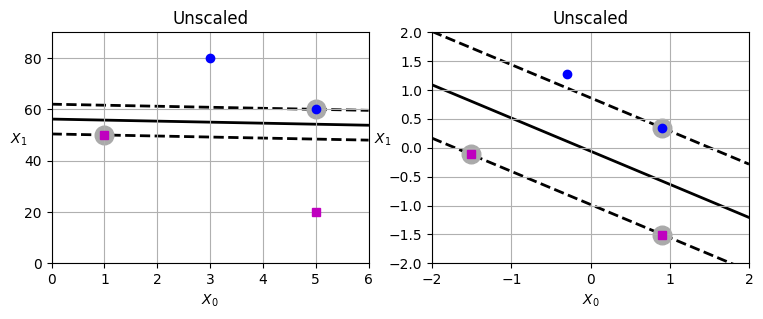

In [12]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float32)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
Xs_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(Xs_scaled, ys)

plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.axis([0, 6, 0, 90])
plt.xlabel("$X_0$")
plt.ylabel("$X_1$", rotation=0)
plt.title("Unscaled")
plt.grid()

plt.subplot(122)
plt.plot(Xs_scaled[:, 0][ys == 0], Xs_scaled[:, 1][ys == 0], "ms")
plt.plot(Xs_scaled[:, 0][ys == 1], Xs_scaled[:, 1][ys == 1], "bo")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.axis([-2, 2, -2, 2])
plt.xlabel("$X_0$")
plt.ylabel("$X_1$", rotation=0)
plt.title("Unscaled")
plt.grid()

plt.show()

## Soft Margin Classification

In [13]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

In [14]:
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

SVC(C=1000000000, kernel='linear')

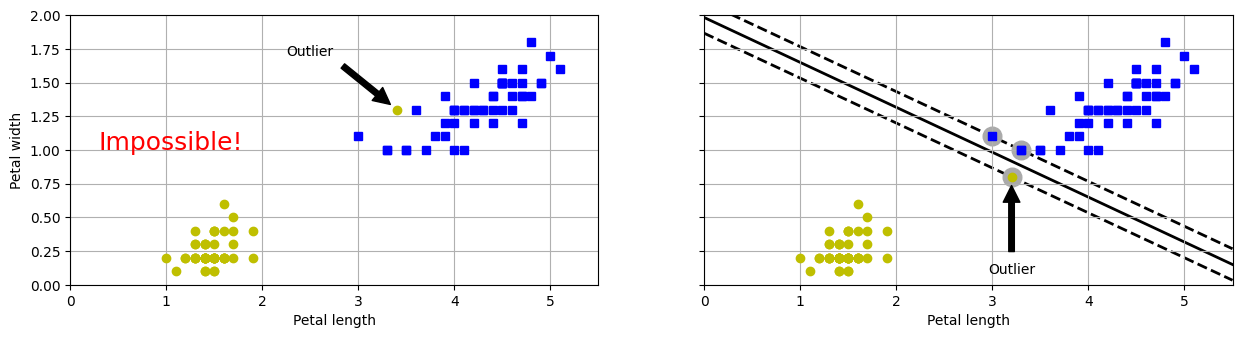

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 3.5), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs")
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor="black", shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo1 == 1], Xo2[:, 1][yo1 == 1], "bs")
plt.plot(Xo2[:, 0][yo1 == 0], Xo2[:, 1][yo1 == 0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor="black", shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target == 2  # Iris virginica

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [17]:
X_new = [[5.5, 1.7], [5.0, 1.3]]
svm_clf.predict(X_new)

array([ True, False])

In [18]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.66980958])

In [19]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=100, dual=True, max_iter=10000, random_state=42))])

In [20]:
# Convert to unscaled parameter
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

In [21]:
# Find support vectors (linearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

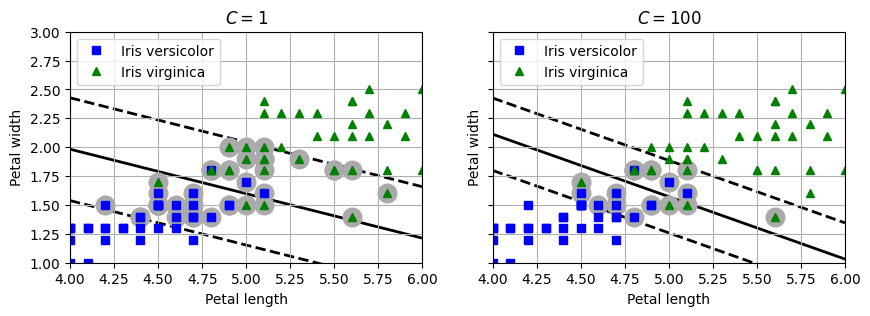

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 3), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris virginica")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C={svm_clf1.C}$")
plt.axis([4, 6, 1, 3])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris virginica")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C={svm_clf2.C}$")
plt.axis([4, 6, 1, 3])
plt.grid()
plt.show()

# Nonlinear SVM Classification

In [23]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

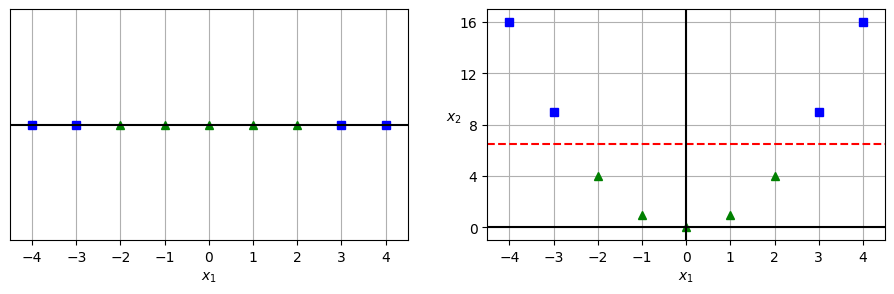

In [24]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.plot(X1D[:, 0][y == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y == 1], np.zeros(5), "g^")
plt.axhline(y=0, color="k")
plt.yticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])
plt.grid()

plt.subplot(122)
plt.plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], "bs")
plt.plot(X2D[:, 0][y == 1], X2D[:, 1][y == 1], "g^")
plt.plot([-5, 5], [6.5, 6.5], "r--")
plt.yticks([0, 4, 8, 12, 16])
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.axis([-4.5, 4.5, -1, 17])
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)

plt.subplots_adjust(right=1)
plt.show()

Here in this notebook, we will create a dataset using make_moons: A method to create a dataset consists of two interleaving half circles, specify for binary classification toy problems.

In [25]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42),
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

In [26]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid()
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)


def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_predict = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_predict, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

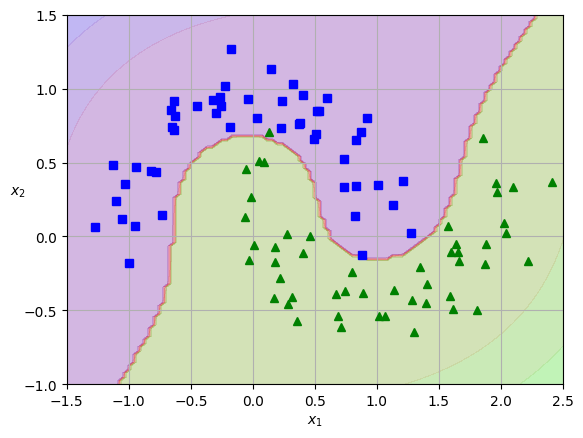

In [28]:
plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1.0, 1.5])

plt.show()

## Polynomial Kernel

In [29]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(), SVC(kernel="poly", degree=100, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, degree=100, kernel='poly'))])